In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from backend import data_paths
from backend import evaluation_utils
from backend import gauge_groups_utils
from backend import loading_utils

## Gauge Groups

In [3]:
gauges = gauge_groups_utils.get_full_gauge_group()
print(f'There are {len(gauges)} gauges.')

There are 5678 gauges.


In [4]:
# Read GloFAS Metadata file.
glofas_v4_metadata = loading_utils.load_glofas_v4_calibration_metadata_file()
glofas_v4_gauges = [gauge for gauge in glofas_v4_metadata.index]

# Find gauge group intersection.
calibration_v4_gauges = list(set(gauges).intersection(glofas_v4_gauges))
print(f'There are {len(calibration_v4_gauges)} v4 benchmarking gauges.')

There are 1144 v4 benchmarking gauges.


In [5]:
glofas_metadata = loading_utils.load_glofas_v4_metadata_file()
glofas_gauges = list(set(glofas_metadata.index).intersection(set(calibration_v4_gauges)))
print(f'There are {len(glofas_gauges)} GloFAS gauges.')

There are 1144 GloFAS gauges.


# Plot Metrics CDFs

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


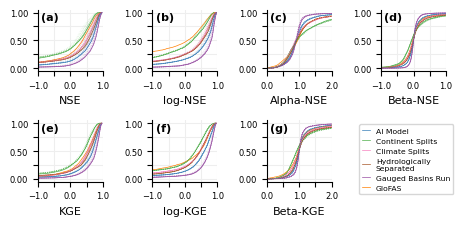

In [6]:
evaluation_utils.hydrograph_metrics_cdf_plots(
    glofas_basepath=data_paths.PER_METRIC_GLOFAS_2014_HYDROGRAPH_METRICS_DIR,
    google_basepath=data_paths.PER_METRIC_GOOGLE_2014_HYDROGRAPH_METRICS_DIR,
    title=None,
    lead_times=list(range(8))
)
evaluation_utils.save_figure(data_paths.HYDROGRAPH_METRICS_WITH_LEAD_TIMES_CDFS_FILENAME)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


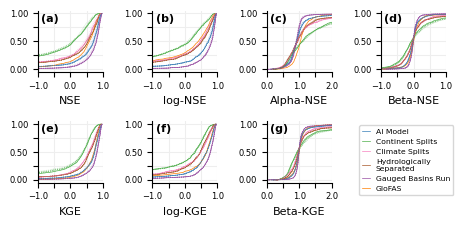

In [7]:
evaluation_utils.hydrograph_metrics_cdf_plots(
    glofas_basepath=data_paths.PER_METRIC_GLOFAS_2014_HYDROGRAPH_METRICS_DIR,
    google_basepath=data_paths.PER_METRIC_GOOGLE_2014_HYDROGRAPH_METRICS_DIR,
    title=None,
    lead_times=list(range(8)),
    gauges=glofas_gauges
)
evaluation_utils.save_figure(data_paths.HYDROGRAPH_METRICS_GLOFAS_CALIBRATED_CDFS_FILENAME)